In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<font color="red" size="6">Import Libraries</font>

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import pipeline
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score, f1_score, precision_recall_curve, plot_precision_recall_curve, average_precision_score, auc
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from scipy import stats
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix

<font color="red" size="6">Load Input and Output</font>

In [ ]:
#GIVE THE PATH FOR THE INPUT AND OUTPUT FILES
IN = pickle.load(open('/content/drive/MyDrive/Input_output_regression/Final_IO/Trainval_comb/new_input_trainvalcomb.pickle','rb'))
OUT = pickle.load(open('/content/drive/MyDrive/Input_output_regression/Final_IO/output.pickle','rb'))

In [ ]:
IN

,BF_0_OUT_1,BF_0_OUT_2,BF_0_OUT_3,FC_0_OUT_1,FC_0_OUT_2,FC_0_OUT_3,MSW_0_OUT_1,MSW_0_OUT_2,MSW_0_OUT_3,ASSET_0_OUT_1,...,ASSET_N_OUT_3,dc_score_none_size_only,dc_score_none_size_intensity_only,dc_score_none_intensity_only,dc_score_log_size_only,dc_score_log_size_intensity_only,dc_score_log_intensity_only,dc_score_sqrt_size_only,dc_score_sqrt_size_intensity_only,dc_score_sqrt_intensity_only
Village_ID,,,,,,,,,,,,,,,,,,,,,
347135.0,0.996886,2.804913e-03,3.085900e-04,0.984029,0.014411,0.001560,0.333333,0.333333,0.333333,0.841631,...,0.016892,-1.078912,0.885764,2.745341,-0.823889,0.721405,1.375449,-1.026595,0.827574,2.086867
347136.0,0.803792,1.606696e-01,3.553830e-02,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.990326,...,0.019993,-1.078912,0.885764,2.745341,-0.823889,0.721405,1.375449,-1.026595,0.827574,2.086867
347137.0,0.999925,6.222542e-06,6.883658e-05,0.879349,0.119669,0.000982,0.333333,0.333333,0.333333,0.828607,...,0.016926,-1.078912,0.885764,2.745341,-0.823889,0.721405,1.375449,-1.026595,0.827574,2.086867
347138.0,1.000000,8.502429e-08,1.301872e-08,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.128469,...,0.019393,-1.078912,0.885764,2.745341,-0.823889,0.721405,1.375449,-1.026595,0.827574,2.086867
347139.0,0.999262,4.217611e-09,7.383435e-04,0.545641,0.444846,0.009513,0.333333,0.333333,0.333333,0.142207,...,0.020310,-1.078912,0.885764,2.745341,-0.823889,0.721405,1.375449,-1.026595,0.827574,2.086867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597104.0,0.988058,6.845038e-03,5.096631e-03,0.333333,0.333333,0.333333,0.121657,0.094932,0.783411,0.124646,...,0.442446,0.419805,0.599387,-0.360218,0.573613,0.608480,0.225646,0.527030,0.630413,-0.111719
597105.0,0.603880,8.308426e-03,3.878113e-01,0.333333,0.333333,0.333333,0.200749,0.201678,0.597574,0.012003,...,0.313531,0.419805,0.599387,-0.360218,0.573613,0.608480,0.225646,0.527030,0.630413,-0.111719
597106.0,0.999546,3.706203e-04,8.294324e-05,0.205627,0.001459,0.792914,0.085841,0.027875,0.886283,0.212115,...,0.442665,0.419805,0.599387,-0.360218,0.573613,0.608480,0.225646,0.527030,0.630413,-0.111719


In [ ]:
OUT

,Govt Primary School (Numbers),Govt Middle School (Numbers),Govt Arts and Science Degree College (Numbers),Hospital Allopathic (Numbers),Primary Health Centre (Numbers),Maternity And Child Welfare Centre (Numbers),Post Office (Status A(1)/NA(2)),Telephone (landlines) (Status A(1)/NA(2)),Public Bus Service (Status A(1)/NA(2)),Railway Station (Status A(1)/NA(2)),Navigable Waterways (River/Canal) (Status A(1)/NA(2)),Sports Club/Recreation Centre (Status A(1)/NA(2)),Cinema/Video Hall (Status A(1)/NA(2))
Village Code,,,,,,,,,,,,,
347135.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347136.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
347137.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347138.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
347139.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
597104.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
597105.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
597106.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color="red" size="6">Create Model Inputs and Outputs</font>

In [ ]:
X, Y_all = IN.copy(), OUT.copy()
Y = Y_all.iloc[:,1].astype('float64')

# We're doing binary classification
# Set a threshold "t" such that the values in Y less than or equal to "t" will be 0, and greater than "t" will be 1
t = 1
print(len(Y.iloc[np.where(Y <= 1)[0]]), len(Y.iloc[np.where(Y <= 1)[0]]))
Y.iloc[np.where(Y <= t)[0]] = 0
Y.iloc[np.where(Y > t)[0]] = 1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0, stratify=Y)
# X_train, Y_train = X[:int(len(X)*0.8), :], Y[:int(len(Y)*0.8)]
# X_test, Y_test = X[int(len(X)*0.8):, :], Y[int(len(Y)*0.8):]

303471 37482


In [ ]:
3748200/303471

12.351097798471683

In [ ]:
X_train.shape, X_test.shape

((272762, 105), (68191, 105))

In [ ]:
len(np.where(Y_train==0)[0]), len(np.where(Y_train==1)[0])

(141142, 131620)

<font color="red" size="6">Feature Selection Techniques</font>

<font color="blue" size="4">ANOVA correlation based feature selection</font>

In [ ]:
# Feature selection based on 
k = 40
fs = SelectKBest(score_func=f_classif, k=k)
fs.fit(X_train, Y_train)
X_train, X_test = fs.transform(X_train), fs.transform(X_test)

<font color="blue" size="4">Random-Forest based feature selection</font>

In [ ]:
def random_forest_features(X_train, Y_train):
  sel = RandomForestClassifier(n_estimators=20, max_features='log2', class_weight='balanced_subsample', min_samples_split=0.005, max_samples=0.7, oob_score=True, n_jobs=-1, random_state=0)
  sel.fit(X_train, Y_train)
  return sel.feature_importances_

In [ ]:
X_train.shape, X_test.shape

((272762, 114), (68191, 114))

In [ ]:
cols = random_forest_features(X_train, Y_train)

In [ ]:
# cols = random_forest_features(X_train, Y_train)
thresh = np.mean(cols)
ids = np.where(cols >= thresh)[0]
# ids = np.argsort(cols)[::-1][:40]
IN.columns[ids]

Index(['MSW_0_OUT_2', 'MSW_0_OUT_3', 'ASSET_0_OUT_3', 'MSW_1_OUT_3',
       'ASSET_1_OUT_1', 'MSW_3_OUT_3', 'MSW_4_OUT_2', 'BF_N_OUT_1',
       'BF_N_OUT_2', 'FC_N_OUT_2', 'FC_N_OUT_3', 'MSW_N_OUT_2', 'MSW_N_OUT_3',
       'ASSET_N_OUT_3', 'dc_score_none_size_only',
       'dc_score_none_size_intensity_only', 'dc_score_none_intensity_only',
       'dc_score_log_size_intensity_only', 'dc_score_log_intensity_only',
       'dc_score_sqrt_size_intensity_only', 'pop', 'hh', 'log_pop', 'sqrt_pop',
       'log_hh', 'sqrt_hh', 'area', 'log_area', 'sqrt_area'],
      dtype='object')

In [ ]:
X_train, X_test = X_train.iloc[:, ids], X_test.iloc[:, ids]
X_train.shape, X_test.shape

((272762, 29), (68191, 29))

<font color="blue" size="4">Top-20 Feature Selection (based on top features selected over all indicators using Random Forest feature selection)</font>

In [ ]:
# Best features as selected over all the indicators (older version)
# cols_best = ['FC_0_OUT_3', 'ASSET_4_OUT_3', 'MSW_N_OUT_3', 'dc_score_log_size_intensity', 'dc_score_sqrt_intensity_only', 'FC_N_OUT_1', 'dc_score_log_size_only', 'dc_score_sqrt_size_intensity', 'FC_N_OUT_2', 'dc_score_sqrt_size_only',  'FC_0_OUT_1', 'MSW_N_OUT_2', 'dc_score_log_intensity_only', 'ASSET_3_OUT_3', 'dc_score_none_size_only', 'ASSET_0_OUT_1', 'dc_score_log_size_intensity_only', 'MSW_0_OUT_3', 'dc_score_none_intensity_only', 'MSW_0_OUT_2']
cols_best = []
# cols_best.extend(list(joined.columns))
X_train, X_test = X_train.loc[:, cols_best], X_test.loc[:, cols_best]
X_train.shape, X_test.shape

((272762, 9), (68191, 9))

<font color="red" size="6">Training Random Forest Classifier</font>

In [ ]:
classifier = RandomForestClassifier(n_estimators=20, max_features='log2', min_samples_split=0.005, class_weight='balanced_subsample', max_samples=0.7, oob_score=True, n_jobs=-1, random_state=0)
clf = classifier.fit(X_train, Y_train)

In [ ]:
clf.oob_score_

0.6827967238838255

In [ ]:
clf.score(X_train, Y_train)

0.6859313247446491

In [ ]:
clf.score(X_test, Y_test)

0.6819228343916353

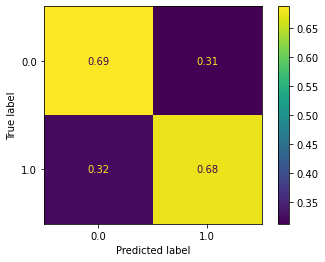

In [ ]:
plot_confusion_matrix(clf, X_test, Y_test, normalize='true')
plt.show()

<font color="red" size="6">Indicator-wise Precision/Recall/F1-Score</font>

In [ ]:
#PRIMARY SCHOOLS
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.70      0.69      0.69     35943
         1.0       0.66      0.68      0.67     32248

    accuracy                           0.68     68191
   macro avg       0.68      0.68      0.68     68191
weighted avg       0.68      0.68      0.68     68191



In [ ]:
#PRIMARY SCHOOLS
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82     48142
         1.0       0.57      0.77      0.66     20049

    accuracy                           0.76     68191
   macro avg       0.73      0.77      0.74     68191
weighted avg       0.80      0.76      0.77     68191



In [ ]:
#MIDDLE SCHOOLS
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78     35286
         1.0       0.75      0.78      0.77     32905

    accuracy                           0.77     68191
   macro avg       0.77      0.77      0.77     68191
weighted avg       0.77      0.77      0.77     68191



In [ ]:
#COLLEGES
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89     65513
         1.0       0.13      0.67      0.22      2678

    accuracy                           0.81     68191
   macro avg       0.56      0.74      0.55     68191
weighted avg       0.95      0.81      0.86     68191



In [ ]:
#ALLOPATHIC HOSPITALS
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93     67619
         1.0       0.04      0.66      0.08       572

    accuracy                           0.88     68191
   macro avg       0.52      0.77      0.51     68191
weighted avg       0.99      0.88      0.93     68191



In [ ]:
#PRIMARY HEALTH CENTRES
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89     65899
         1.0       0.12      0.74      0.20      2292

    accuracy                           0.80     68191
   macro avg       0.55      0.77      0.54     68191
weighted avg       0.96      0.80      0.86     68191



In [ ]:
#MATERNITY AND CHILD-WELFARE CENTRES
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87     64287
         1.0       0.17      0.77      0.28      3904

    accuracy                           0.78     68191
   macro avg       0.58      0.77      0.57     68191
weighted avg       0.94      0.78      0.83     68191



In [ ]:
#POST OFFICE
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.77      0.86     61040
         1.0       0.28      0.75      0.41      7151

    accuracy                           0.77     68191
   macro avg       0.62      0.76      0.63     68191
weighted avg       0.89      0.77      0.81     68191



In [ ]:
#LANDLINE
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80     35943
         1.0       0.79      0.72      0.76     32248

    accuracy                           0.78     68191
   macro avg       0.78      0.78      0.78     68191
weighted avg       0.78      0.78      0.78     68191



In [ ]:
#BUS SERVICES
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79     37485
         1.0       0.75      0.70      0.73     30706

    accuracy                           0.76     68191
   macro avg       0.76      0.76      0.76     68191
weighted avg       0.76      0.76      0.76     68191



In [ ]:
#RAILWAY SERVICES
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86     66607
         1.0       0.05      0.55      0.10      1584

    accuracy                           0.76     68191
   macro avg       0.52      0.65      0.48     68191
weighted avg       0.96      0.76      0.84     68191



In [ ]:
#CANALS
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83     62528
         1.0       0.20      0.77      0.31      5663

    accuracy                           0.72     68191
   macro avg       0.58      0.74      0.57     68191
weighted avg       0.91      0.72      0.78     68191



In [ ]:
#SPORTS CLUBS
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.72      0.83     58893
         1.0       0.32      0.81      0.46      9298

    accuracy                           0.74     68191
   macro avg       0.64      0.77      0.64     68191
weighted avg       0.87      0.74      0.78     68191



In [ ]:
#VIDEO HALLS
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88     64319
         1.0       0.20      0.85      0.32      3872

    accuracy                           0.79     68191
   macro avg       0.59      0.82      0.60     68191
weighted avg       0.94      0.79      0.85     68191



<font color="red" size="6">Save Model</font>

In [ ]:
pickle.dump(clf, open('/content/drive/MyDrive/Input_output_regression/Models/clf_video_top20_traincombval_areapop.pickle','wb'))